# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functions

# Nagel Schreckenberg simulation

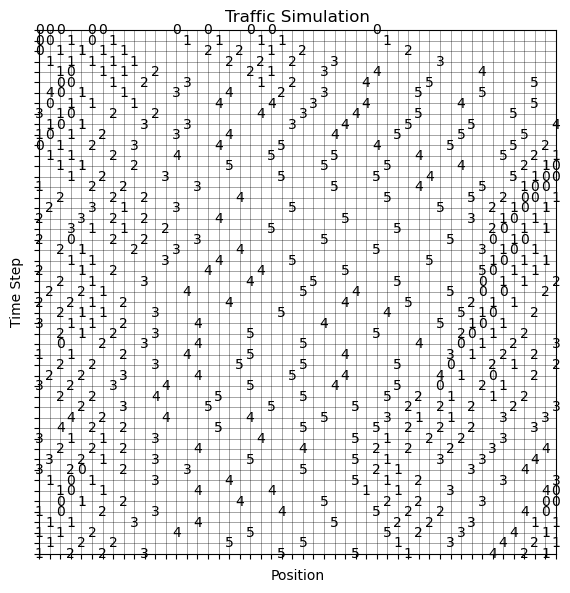

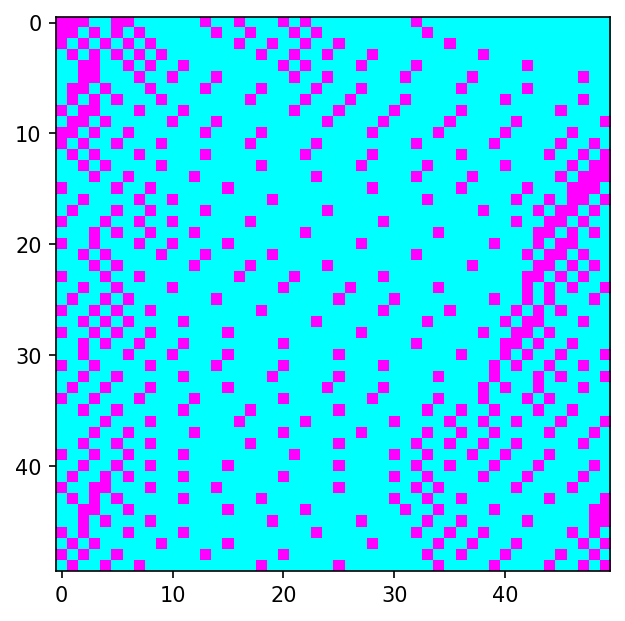

In [4]:
tmax = 50
L = 50
N = 10
vmax = 5
p = 0.2

simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax, seed=2024)[0]
functions.plot_simulation(simulation)


points = np.zeros((tmax, L))
for i in range(L):
    for j in range(tmax):
        if simulation[j][i] > -1:
            points[j][i] = 1
        else:
            points[j][i] = 0

plt.figure(dpi=150)
plt.imshow(points, cmap = "cool", interpolation = "nearest")
plt.show()

# Flow vs density

The time-averaged flow q between i and i+1 is:

$q = \frac{1}{T}\sum_{t=t_0+1}^{t_0+T}n_{i,i+1}(t)$

The density p on a fixed site i averaged over a time period T:

$p = \frac{1}{T}\sum_{t=t_0+1}^{t_0+T}n_{i}(t)$

49


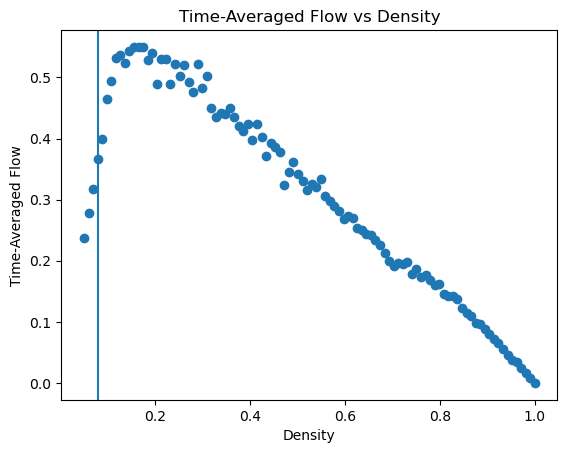

In [5]:
# Parameters
L = 500
t_max = 500 
v_max = 5
p = 0.2
N = 10



# Evenly spaced density values
densities = np.linspace(0.05, 1, 100)

flow_vs_density = []
car_densities = []

for density in densities:
    single_cell_flow = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max, seed = 2024)[3]
    car_density = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max, seed = 2024)[2]
    
    final_single_cell_flow = single_cell_flow/t_max
    final_car_density = car_density/t_max

    flow_vs_density.append(final_single_cell_flow)
    car_densities.append(final_car_density)

# Plotting
plt.scatter(densities, flow_vs_density) # Not sure whether to use car_densities or densities here
plt.xlabel('Density')
plt.ylabel('Time-Averaged Flow')
plt.title('Time-Averaged Flow vs Density')
plt.axvline(x=0.08)
plt.show()




# Cluster distribution 

(a way of measuring the amount of traffic)

The below plot (visually) shows that the clusters fluctuate a lot but overall neither increase nor decrease.

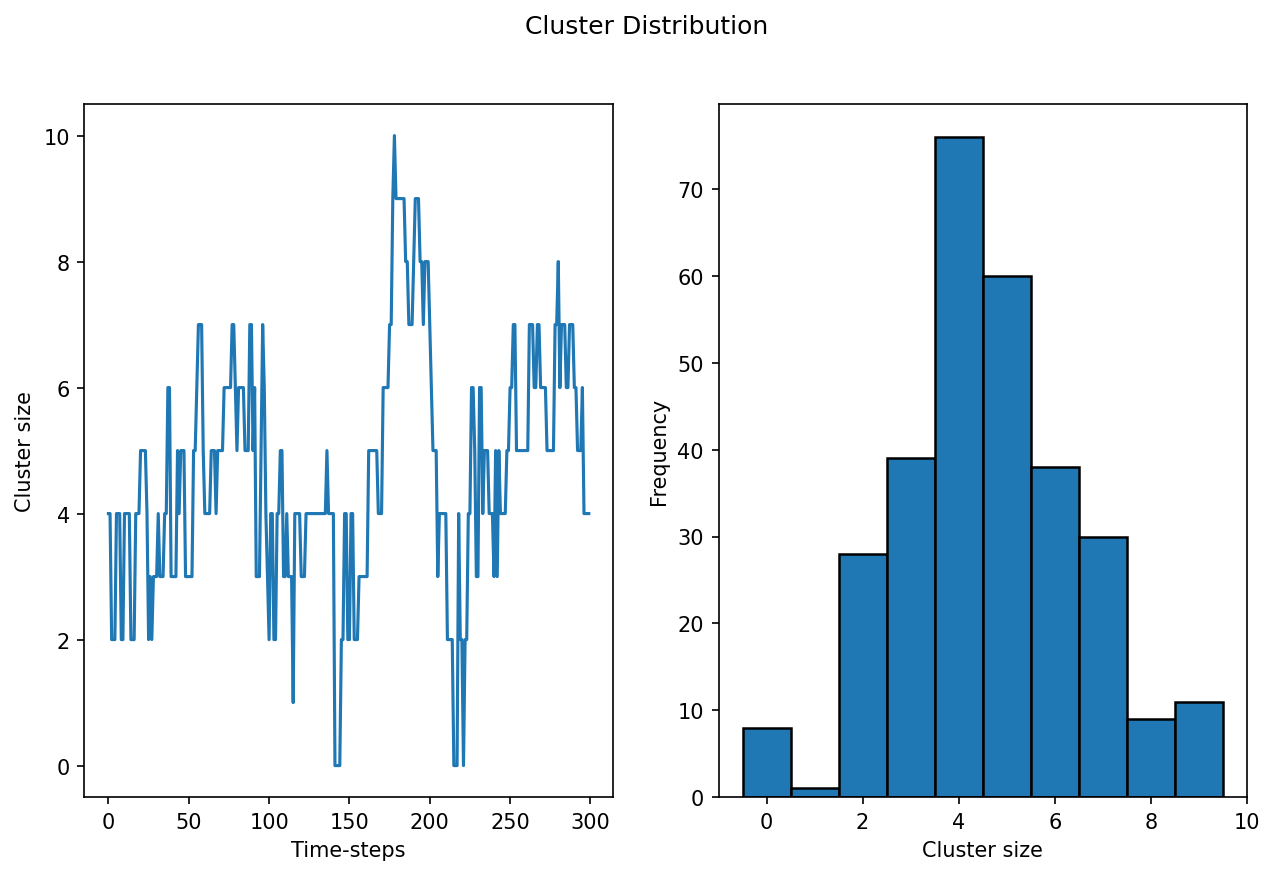

The average number of cells in clusters at one time is 4.626666666666667 .
This corresponds to 46.266666666666666 percent of cars stuck in traffic.


In [6]:
# Parameters
L = 50  
N = 10
v_max = 5
p = 0.8
t_max = 300

cluster_distribution = functions.Nagel_Schreckenberg(L, N, v_max, p, t_max)[1]
x = np.arange(min(cluster_distribution), max(cluster_distribution))

# Plotting
fig, axs = plt.subplots(1,2, dpi=150, figsize = (10,6))
axs[0].plot(range(t_max), cluster_distribution)
axs[0].set_xlabel('Time-steps')
axs[0].set_ylabel('Cluster size')
axs[1].hist(cluster_distribution, bins = len(x), align = 'left', edgecolor = 'black', linewidth = 1.2)
axs[1].set_xlabel('Cluster size')
axs[1].set_ylabel('Frequency')
plt.suptitle('Cluster Distribution')
plt.show()

'''Average number of clusters and its variation for a fixed density'''

# Calculate the average
average_cells_in_clusters = np.mean(cluster_distribution)
percentage_in_traffic = 100*average_cells_in_clusters/N

print("The average number of cells in clusters at one time is", average_cells_in_clusters,".") 
print("This corresponds to", percentage_in_traffic, "percent of cars stuck in traffic.")

# Calculate the variance

Percentage of cells/cars in clusters/traffic for different densities

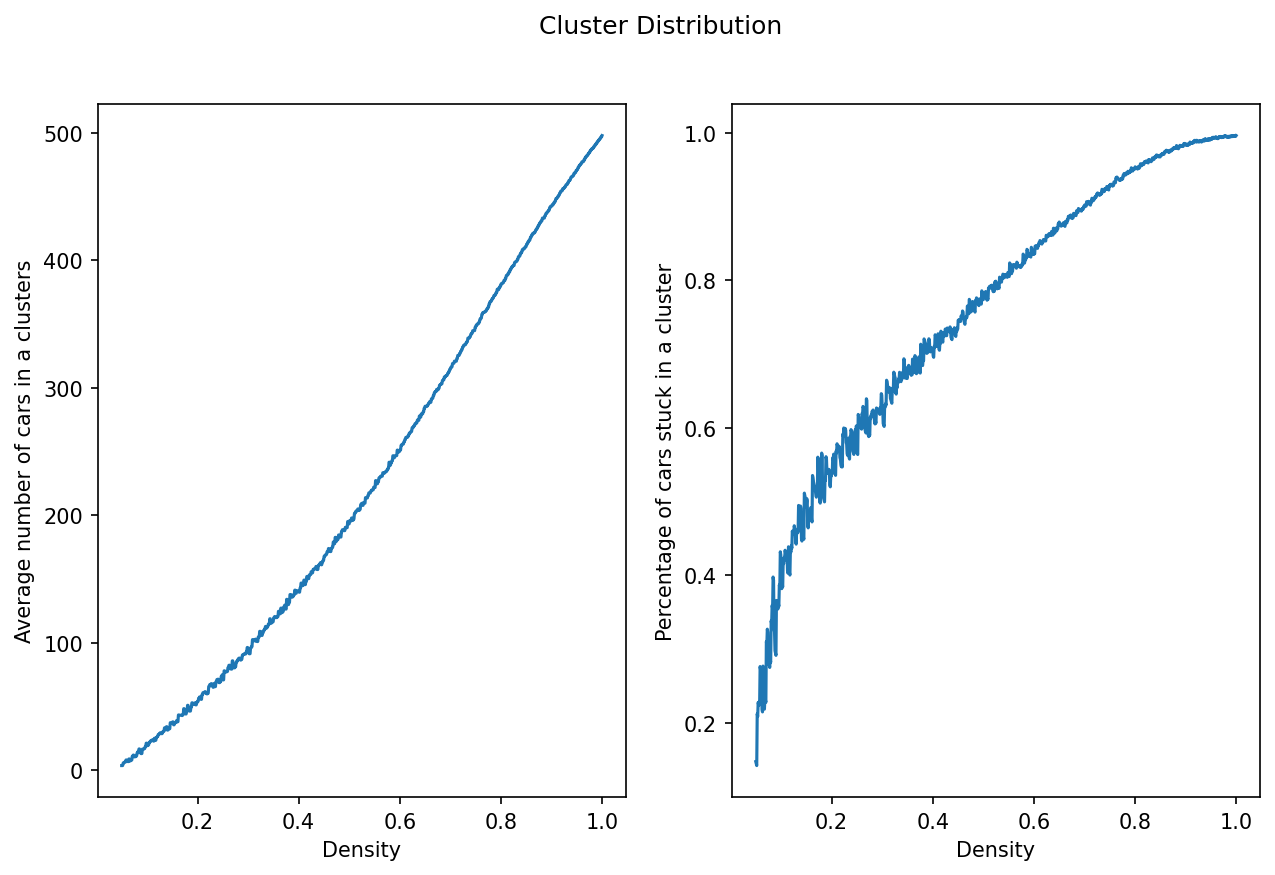

In [7]:
L = 500
N = 10
v_max = 5
p = 0.8
t_max = 1000
densities = np.linspace(0.05, 1, 1000)

cluster_averages = []
percent_average = []

for density in densities:
    cluster_list = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max)[1]
    cluster_average = np.mean(cluster_list)
    cluster_averages.append(cluster_average)
    percent_average.append(cluster_average/(density*L))
    

# Plotting
fig, axs = plt.subplots(1,2, dpi=150, figsize = (10,6))
axs[0].plot(densities, cluster_averages)
axs[0].set_xlabel('Density')
axs[0].set_ylabel('Average number of cars in a clusters')
axs[1].plot(densities, percent_average)
axs[1].set_xlabel('Density')
axs[1].set_ylabel('Percentage of cars stuck in a cluster')
plt.suptitle('Cluster Distribution')
plt.show()

Average number of cells in clusters (zoomed in to small densities)

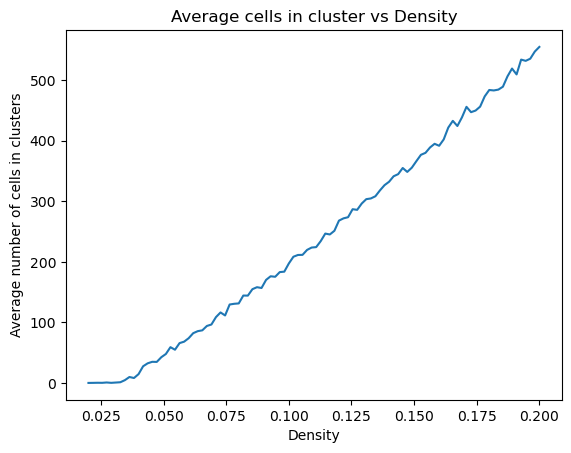

In [8]:
# Parameters
L = 5000
N = 10
v_max = 5
p = 0.8
t_max = 1000

densities = np.linspace(0.02, 0.2, 100)

cluster_averages = []

for density in densities:
    cluster_list = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max)[1]
    cluster_average = np.mean(cluster_list)
    cluster_averages.append(cluster_average)

# Plotting
plt.plot(densities, cluster_averages)
plt.xlabel('Density')
plt.ylabel('Average number of cells in clusters')
plt.title('Average cells in cluster vs Density')
plt.show()


Number of clusters and their size

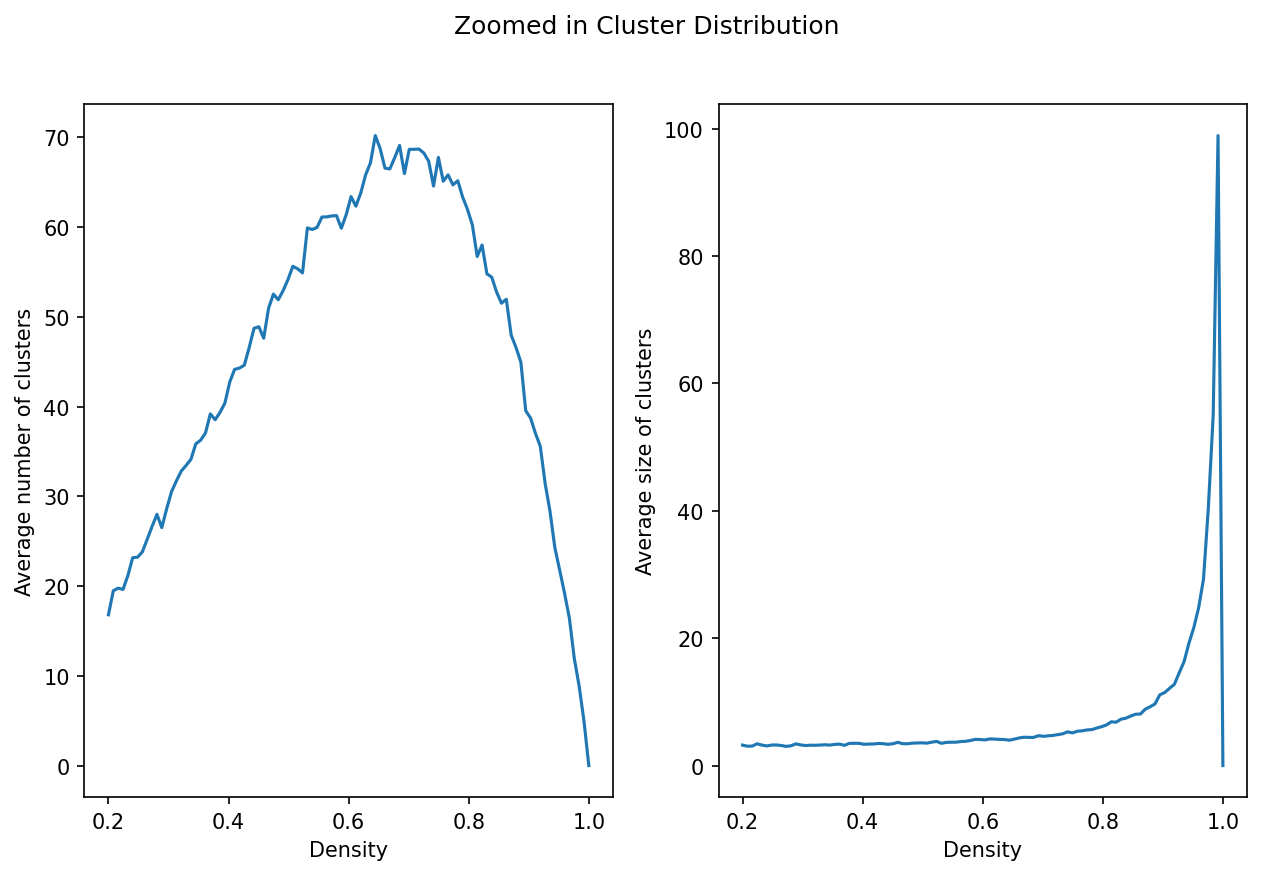

In [9]:
# Parameters
L = 500
N = 10
v_max = 5
p = 0.8
t_max = 1000

densities = np.linspace(0.2, 1, 100)

average_cells_in_clusters_per_density = []
average_number_clusters_per_density = []
average_cluster_sizes = []


for density in densities:

    result = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max)
    cells_cluster_list = result[1]
    cluster_count_list = result[5]
    
    # Cells calculations
    cells_cluster_average = np.mean(cells_cluster_list)
    average_cells_in_clusters_per_density.append(cells_cluster_average)

    # Cluster calculations
    cluster_count_average = np.mean(cluster_count_list)
    average_number_clusters_per_density.append(cluster_count_average)

    # Cluster size calculations
    average_cluster_size = cells_cluster_average/cluster_count_average if cluster_count_average != 0 else 0
    average_cluster_sizes.append(average_cluster_size)


# Plotting two graphs: number of cells in clusters and number of clusters
fig, axs = plt.subplots(1,2, dpi=150, figsize = (10,6))
axs[0].plot(densities, average_number_clusters_per_density)
axs[0].set_xlabel('Density')
axs[0].set_ylabel('Average number of clusters')
axs[1].plot(densities, average_cluster_sizes)
axs[1].set_xlabel('Density')
axs[1].set_ylabel('Average size of clusters')
plt.suptitle('Zoomed in Cluster Distribution')
plt.show()





# Average velocity

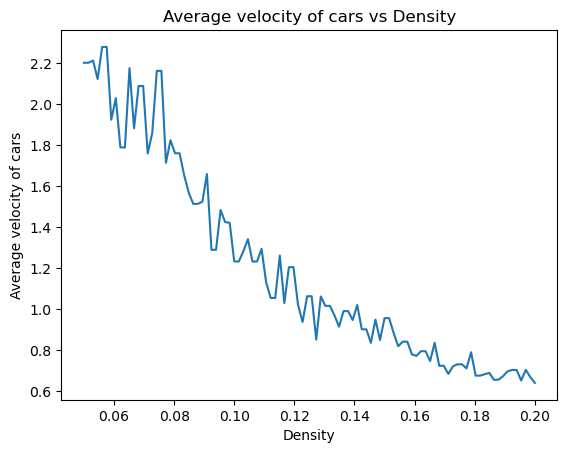

In [10]:
# Parameters
L = 500
N = 100
v_max = 5
p = 0.8
t_max = 100

densities = np.linspace(0.05, 0.2, 100)

velocity_averages = []

for density in densities:
    velocity_average = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max)[4]
    velocity_averages.append(velocity_average)

# Plotting
plt.plot(densities, velocity_averages)
plt.xlabel('Density')
plt.ylabel('Average velocity of cars')
plt.title('Average velocity of cars vs Density')
plt.show()

Average velocity of cars vs max car velocity

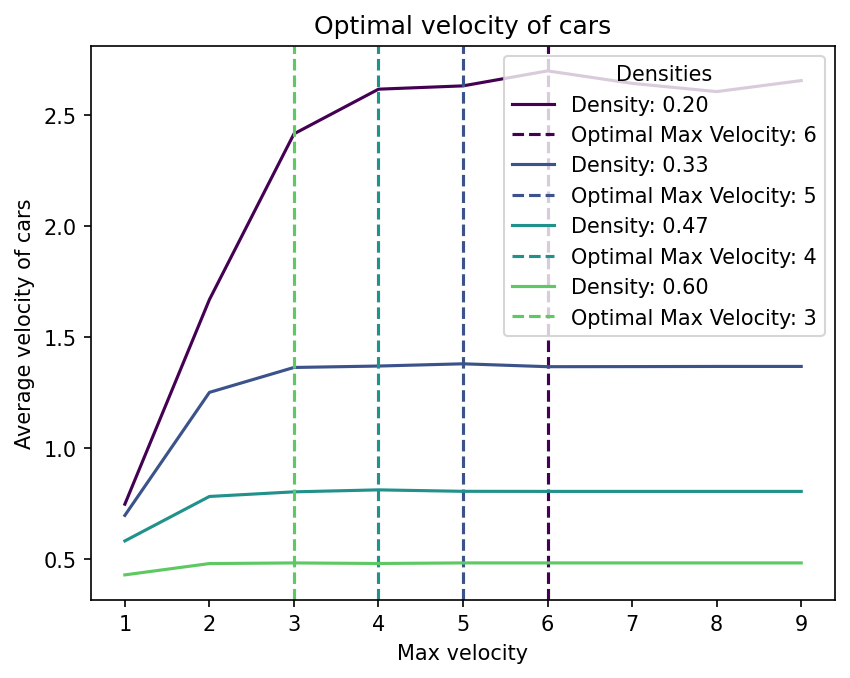

In [11]:
# Parameters
L = 500
N = 250
p = 0.2
t_max = 1000

v_max = np.arange(1, 10, 1)
densities = np.linspace(0.2, 0.6, 4)

velocity_averages = []

for v in v_max:
    for density in densities:
        velocity_average = functions.Nagel_Schreckenberg(L, int(L * density), v, p, t_max)[4]
        velocity_averages.append(velocity_average)

# Reshape velocity_averages to match the shape of v_max and densities
velocity_averages = np.array(velocity_averages).reshape(len(v_max), len(densities))


plt.figure(dpi=150)
# For each density
for i in range(len(densities)):
    # Plotting the lines with gradients of colour
    colour = plt.cm.viridis(i / float(len(densities))) 
    plt.plot(v_max, velocity_averages[:, i], color=colour, label=f'Density: {densities[i]:.2f}')

    # Calculate the rate of change of velocity for each density
    rate_of_change = np.diff(velocity_averages[:, i]) / np.diff(v_max)

    # Find the indexes where the rate of change starts decreasing
    optimal_index = np.argmax(rate_of_change < 0)

    # Find the max velocity that corresponds to this index
    optimal_v_max = v_max[optimal_index]

    # Plot the dashed vertical line for optimal max velocity
    plt.axvline(x=optimal_v_max, color=colour, linestyle='--', label=f'Optimal Max Velocity: {optimal_v_max}')

plt.xlabel('Max velocity')
plt.ylabel('Average velocity of cars')
plt.title('Optimal velocity of cars')
plt.legend(title='Densities')
plt.show()


Since we're working with discrete, small velocities, and there is randomness, the optimal velocity changes every run. But we can see that overall a higher density leads to a lower optimal velocity. And what is interesting is that once the optimal velocity is reached, there is no point in having a higher max velocity since the average velocity wouldn't increase.

In [12]:
import functions
help(functions.Nagel_Schreckenberg)

Help on function Nagel_Schreckenberg in module functions:

Nagel_Schreckenberg(L, N, v_max, p, t_max, max_brake=1, max_acceleration=1, seed=2024)
    asdfhjdsf



# Two Lanes

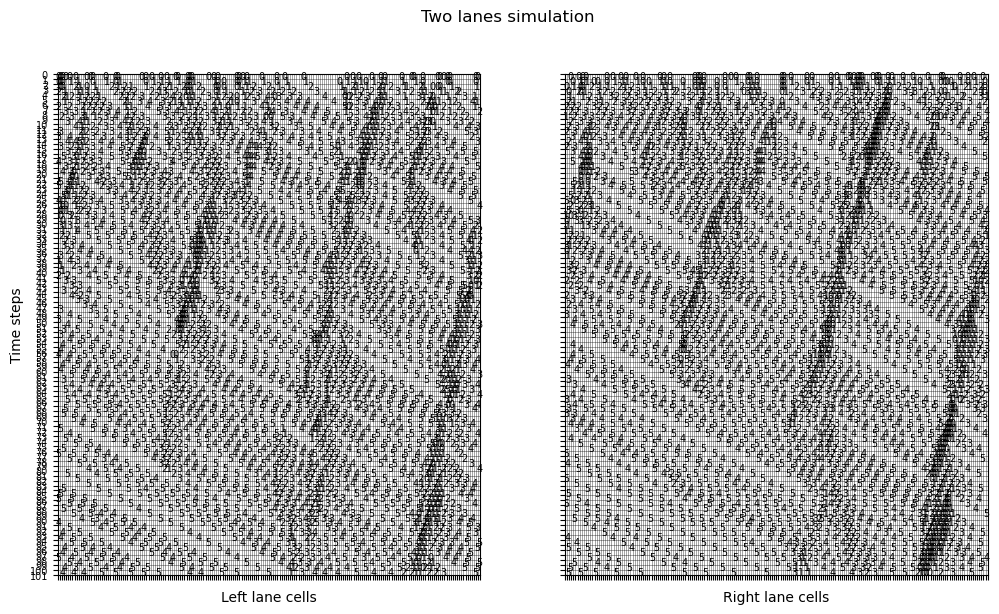

In [3]:
L = 200
N = 50
v_max = 5
p = 0.2
t_max = 100
switch_trigger = 3 # So if there is a car infront that is closer than 3 cells, we wanna move
min_front_gap = 2 # We need two empty spaces to our front side in order to move
min_back_gap = 1 # we're not using this for now so it doesn't matter what it is

left_lane, right_lane, _, _ = functions.Two_Lane_CA(L, N, v_max, p, t_max, switch_trigger, min_front_gap, min_back_gap)
functions.plot_simulation(left_lane, right_lane)



# Average cells in clusters over density

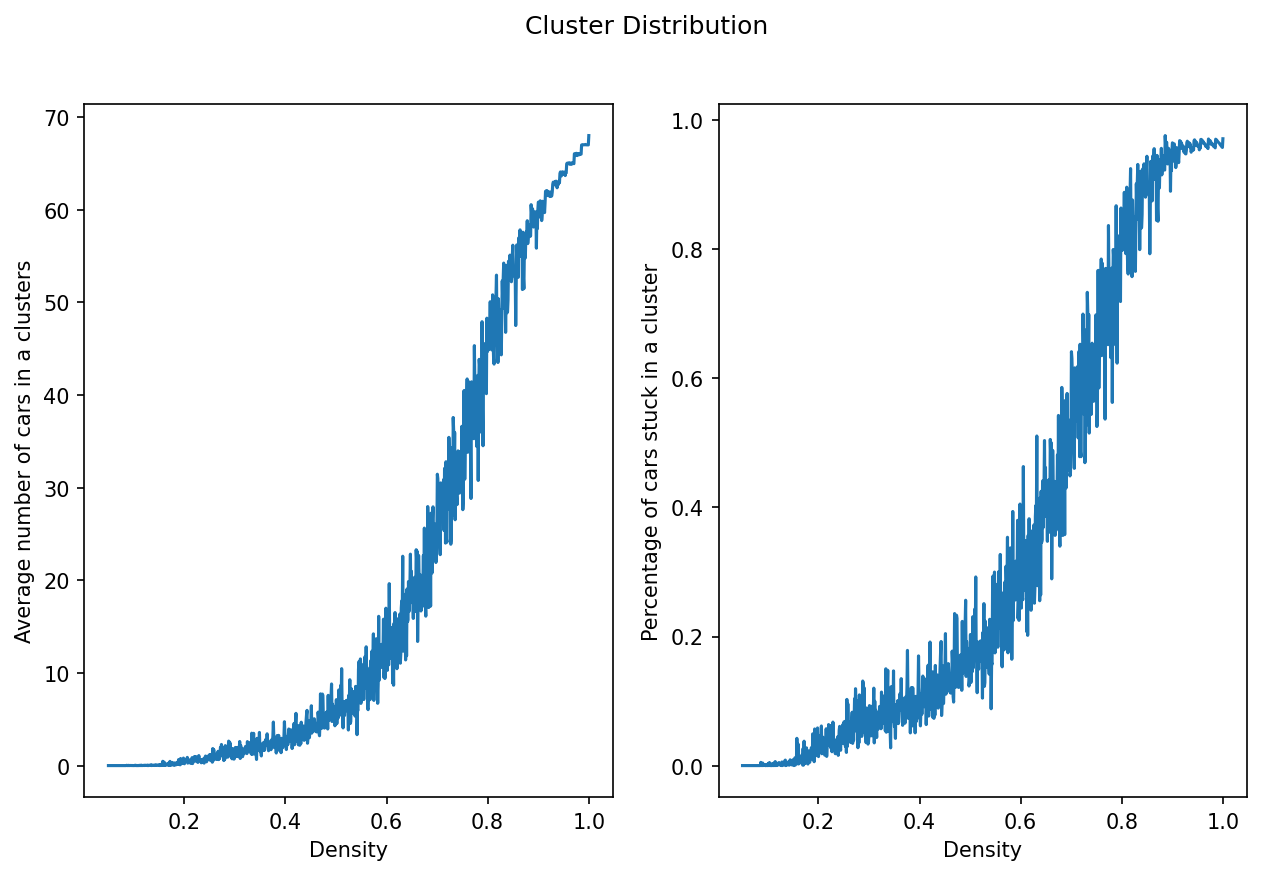

In [4]:
L = 70
N = 20
vmax = 5
p = 0.2
t_max = 100
switch_trigger = 3 
min_front_gap = 2 
min_back_gap = 1

densities = np.linspace(0.05, 1, 1000)

cells_in_cluster_averages = []
percent_average = []

for density in densities:
    cells_in_cluster_list = functions.Two_Lane_CA(L, int(L * density), v_max, p, t_max, switch_trigger, min_front_gap, min_back_gap)[3]/2
    cells_in_cluster_average = np.mean(cells_in_cluster_list)
    cells_in_cluster_averages.append(cells_in_cluster_average)
    percent_average.append(cells_in_cluster_average/(density*L))
    

# Plotting
fig, axs = plt.subplots(1,2, dpi=150, figsize = (10,6))
axs[0].plot(densities, cells_in_cluster_averages)
axs[0].set_xlabel('Density')
axs[0].set_ylabel('Average number of cars in a clusters (per road)')
axs[1].plot(densities, percent_average)
axs[1].set_xlabel('Density')
axs[1].set_ylabel('Percentage of cars stuck in a cluster')
plt.suptitle('Cluster Distribution')
plt.show()